In [29]:
# To play movie
%matplotlib nbagg

In [27]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [9]:
def linestyle_generator():
  """グラフをプロットするときの線種を決めるジェネレーター"""
  linestyle = ['-', '--', '-.', ':']
  lineID = 0
  while True:
    yield linestyle[lineID]
    lineID = (lineID + 1) % len(linestyle)
  
def plot_set(fig_ax, *args):
  """グラフを整える関数"""
  fig_ax.set_xlabel(args[0])    # x軸のラベルをラベルを1つ目の引数で設定
  fig_ax.set_ylabel(args[1])    # y軸のラベルをラベルを2つ目の引数で設定
  fig_ax.grid(ls=':')
  if len(args) == 3:
    fig_ax.legend(loc=args[2])  # 凡例の位置をの位置を3つ目の引数で設定

In [4]:
file_path = "data"
file_name_list = ["1_static", "2_yaw_20sec", "3_yaw_10sec", "4_roll", "5_pitch"]

path = os.path.join(file_path, file_name_list[4]+".csv")
df = pd.read_csv(path)

sampling_time = 0.1
time = np.arange(0, len(df)*sampling_time, sampling_time)

df


,date,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
0,2022-02-09 20:17:05.248522,0.001816,-0.000991,0.996845,-0.077423,0.089439,-0.038712,-0.064820,0.205636,-0.279397
1,2022-02-09 20:17:05.348699,-0.000137,0.000962,1.007588,-0.100311,-0.139442,-0.038712,-0.061467,0.206754,-0.280514
2,2022-02-09 20:17:05.448875,-0.001114,-0.001235,1.015156,0.029388,0.142845,0.144394,-0.065938,0.206754,-0.276044
3,2022-02-09 20:17:05.549002,0.002549,0.000962,1.018574,0.082794,-0.063148,-0.015823,-0.068173,0.211224,-0.276044
4,2022-02-09 20:17:05.649114,0.000595,-0.003188,1.005879,-0.016388,0.104698,-0.130264,-0.068173,0.208989,-0.273809
...,...,...,...,...,...,...,...,...,...,...
95,2022-02-09 20:17:14.764687,0.002549,-0.077895,1.013691,-1.572784,0.081810,0.083359,-0.052527,0.211224,-0.280514
96,2022-02-09 20:17:14.864869,0.001328,-0.088881,1.009541,-0.596222,0.280174,0.113876,-0.063702,0.204518,-0.267103
97,2022-02-09 20:17:14.965030,0.002793,-0.086684,1.012470,1.356903,0.058922,-0.153152,-0.061467,0.202283,-0.269338
98,2022-02-09 20:17:15.065172,0.000107,-0.077407,0.998310,1.272980,-0.017372,-0.130264,-0.051409,0.201166,-0.272691


Text(0.5, 0, 'Time [sec]')

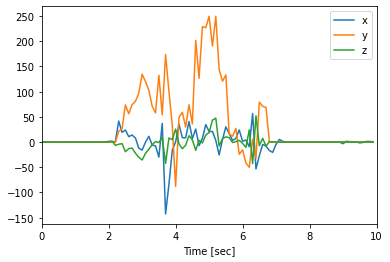

In [6]:


plt.plot(time, df["gyr_x"], label="x")
plt.plot(time, df["gyr_y"], label="y")
plt.plot(time, df["gyr_z"], label="z")
plt.legend()
plt.xlim(0, 10)
plt.xlabel("Time [sec]")
# plt.ylim(-0.2, 0.2)
# plt.savefig("output.png", dpi=300)

No handles with labels found to put in legend.


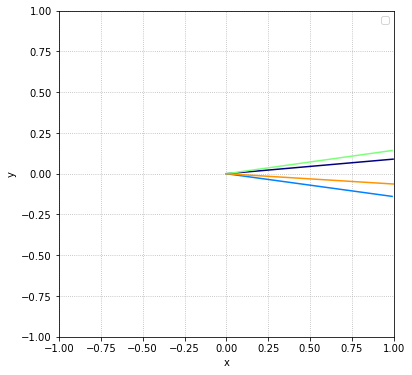

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))

df["x"] = np.cos(df["gyr_y"])
df["y"] = np.sin(df["gyr_y"])

loop_num = 4

for i in range(loop_num):
    x = [0, df["x"][i]]
    y = [0, df["y"][i]]
    ax.plot(x, y, color=cm.jet(i/loop_num))
    
# ax.set_xlim(0, 10)
# ax.axhline(0.0, color='k', linewidth=0.5)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plot_set(ax, 'x', 'y', 'best')

In [33]:
def init():
    return(ax)

def animate(j):
    x = [0, df["x"][j]]
    y = [0, df["y"][j]]
    ax.scatter(x, y, marker='.',c='r', alpha = 0.5)
    time_str = "%s [min]" %(time[j])
    ax.text(25.0, 100.0, 0.04, time_str, bbox=dict(facecolor='white', alpha=1.0), fontsize=10)
    return(ax)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
frame_num = 10


# fig = plt.subplots(figsize=(6, 6))
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d', xlim=(xmin, xmax), ylim=(ymin, ymax))
ax = fig.add_subplot(111, xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_xlabel('x')
# ax.invert_xaxis()
ax.set_ylabel('y')
# ax.set_zlabel('z')
    
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frame_num, interval=50)
anim.save('data/1.gif', dpi=80, writer='imagemagick')
plt.close()

<IPython.core.display.Javascript object>

MovieWriter stderr:
convert: unexpected end-of-file '-': No such file or directory @ error/rgb.c/ReadRGBImage/247.
convert: no images defined `data/1.gif' @ error/convert.c/ConvertImageCommand/3301.



CalledProcessError: Command '['convert', '-size', '512x384', '-depth', '8', '-delay', '5.0', '-loop', '0', 'rgba:-', 'data/1.gif']' returned non-zero exit status 1.

<IPython.core.display.Javascript object>

In [5]:
df["date"] = pd.to_datetime(df["date"])
start = df["date"][0]
df["time"] = df["date"] - start
df

# sampling_time = 0.1
# time = np.arange(0, len(df)*sampling_time, sampling_time)

# plt.plot(time, df["acc_x"])

,date,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,time
0,2022-02-09 20:17:05.248522,0.001816,-0.000991,0.996845,-0.077423,0.089439,-0.038712,-0.064820,0.205636,-0.279397,00:00:00
1,2022-02-09 20:17:05.348699,-0.000137,0.000962,1.007588,-0.100311,-0.139442,-0.038712,-0.061467,0.206754,-0.280514,00:00:00.100177
2,2022-02-09 20:17:05.448875,-0.001114,-0.001235,1.015156,0.029388,0.142845,0.144394,-0.065938,0.206754,-0.276044,00:00:00.200353
3,2022-02-09 20:17:05.549002,0.002549,0.000962,1.018574,0.082794,-0.063148,-0.015823,-0.068173,0.211224,-0.276044,00:00:00.300480
4,2022-02-09 20:17:05.649114,0.000595,-0.003188,1.005879,-0.016388,0.104698,-0.130264,-0.068173,0.208989,-0.273809,00:00:00.400592
...,...,...,...,...,...,...,...,...,...,...,...
95,2022-02-09 20:17:14.764687,0.002549,-0.077895,1.013691,-1.572784,0.081810,0.083359,-0.052527,0.211224,-0.280514,00:00:09.516165
96,2022-02-09 20:17:14.864869,0.001328,-0.088881,1.009541,-0.596222,0.280174,0.113876,-0.063702,0.204518,-0.267103,00:00:09.616347
97,2022-02-09 20:17:14.965030,0.002793,-0.086684,1.012470,1.356903,0.058922,-0.153152,-0.061467,0.202283,-0.269338,00:00:09.716508
98,2022-02-09 20:17:15.065172,0.000107,-0.077407,0.998310,1.272980,-0.017372,-0.130264,-0.051409,0.201166,-0.272691,00:00:09.816650


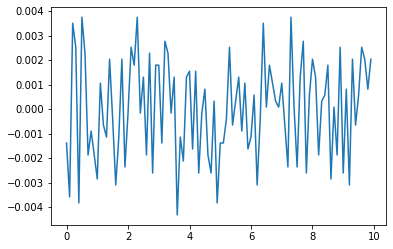

In [7]:
print(os.path.join("a", "b"+".csv", "c"))

a/b.csv/c
